In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('sample_spat.csv')

In [7]:
data['eventState1']=[i.split(',')[0] for i in data['eventState']]
data['eventState2']=[i.split(',')[1] for i in data['eventState']]
data['signalGroup1']=[i.split(',')[0] for i in data['signalGroup']]
data['signalGroup2']=[i.split(',')[1] for i in data['signalGroup']]
data['minEndTime1']=[i.split(',')[0] for i in data['minEndTime']]
data['minEndTime2']=[i.split(',')[1] for i in data['minEndTime']]
data['minEndTime2']=[i.split(',')[1] for i in data['minEndTime']]
data['time_spat']=[i.split(',')[0] for i in data['timeStamp']]
data['time_general']=[i.split(',')[1] for i in data['timeStamp']]

In [8]:
d = np.unique([data['eventState1'], data['eventState2']])
conv = {d[0]:2, d[2]:2, d[1]:1, d[3]:1, d[4]:0}
print(conv)

{'permissive-Movement-Allowed': 2, 'protected-Movement-Allowed': 2, 'permissive-clearance': 1, 'protected-clearance': 1, 'stop-And-Remain': 0}


In [9]:
data['eventState1'] = [conv[i] for i in data['eventState1']]
data['eventState2'] = [conv[i] for i in data['eventState2']]
data.to_csv('modified.csv')

In [77]:
data = pd.read_csv('modified.csv')
data = data.reset_index(drop=True)

0

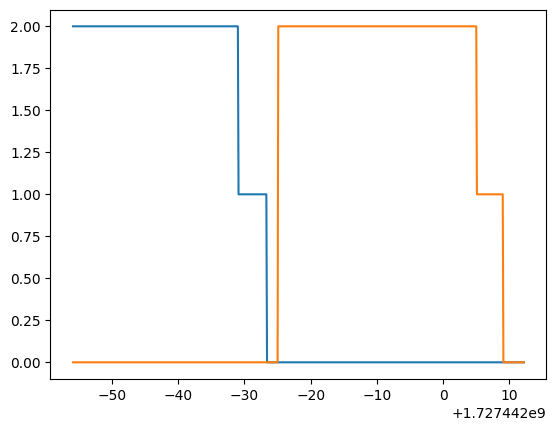

In [97]:
d=data[:1500]
d = d.reset_index(drop=True)
while d.loc[0, 'eventState1']==0:
    d =  d.iloc[1:]
    d = d.reset_index(drop=True)
while d['eventState1'].iloc[-1]==0:
    d =  d.iloc[:-1]
    d = d.reset_index(drop=True)
while d['eventState1'].iloc[-1]!=0:
    d =  d.iloc[:-1]
    d = d.reset_index(drop=True)
plt.plot(d['Epoch Time'], d['eventState1'])
plt.plot(d['Epoch Time'], d['eventState2'])
d.to_csv('oneCycle.csv')

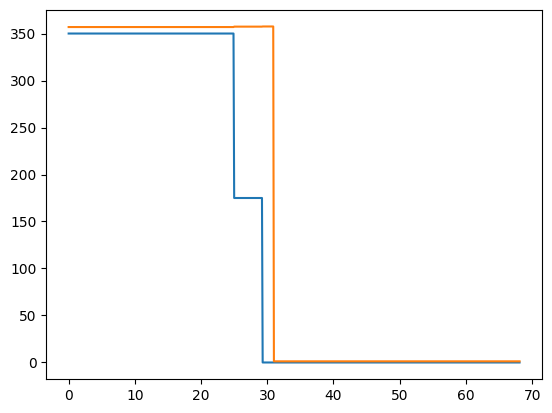

In [131]:
data = pd.read_csv('oneCycle.csv')
t = np.array([i for i in data['Epoch Time']])
t -=t[0]

dy = data[data['eventState1']==1]
# plt.plot(data['minEndTime2'])
min_end_1 = np.array(data['minEndTime1'])/100
spt = np.array(data['time_spat'])
plt.plot(t, np.array(data['eventState1'])*350/2)
plt.plot(t, min_end_1)
# plt.xlim([20, 30])

In [132]:
tt = np.array(dy['Epoch Time'])
print(tt.min())
print(tt.max())
print(tt.max()-tt.min())
print(np.unique(data['minEndTime1']))


1727441969.112343
1727441973.312298
4.199954986572266
[  122 35690 35733 35750]


In [137]:
from datetime import datetime

def getMinofDay(timestamp):
    # Convert to datetime
    dt = datetime.fromtimestamp(timestamp)

    # Calculate minute of the day
    minute_of_day = (dt.hour+4) * 60 + dt.minute
    return minute_of_day

def getMinofYear(timestamp):
    # Convert to datetime
    dt = datetime.fromtimestamp(timestamp)

    # Calculate minute of the day
    start_of_year = datetime(dt.year, 1, 1)

    # Calculate the difference in minutes
    minute_of_year = int((dt - start_of_year).total_seconds() // 60)+4*60
    return minute_of_year


def getsecOfHour(timestamp):
    # Convert to datetime
    dt = datetime.fromtimestamp(timestamp)

    seconds_of_hour = dt.minute * 60 + dt.second
    microseconds_of_hour = seconds_of_hour * 1_000_000 + dt.microsecond
    return int(microseconds_of_hour/100000)




In [138]:
data['minOfDay'] = [getMinofDay(i) for i in data['Epoch Time']]
data['minOfY'] = [getMinofYear(i) for i in data['Epoch Time']]
data['secOFHour'] = [getsecOfHour(i) for i in data['Epoch Time']]

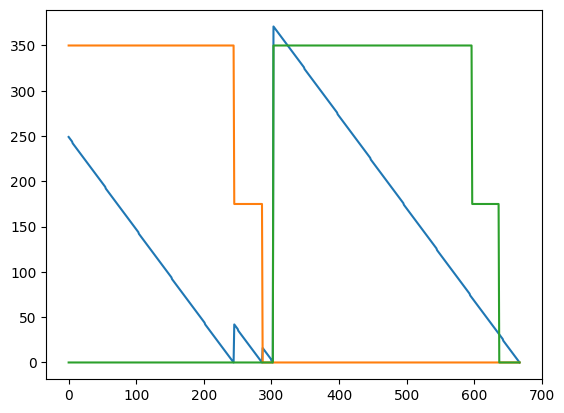

In [144]:
toCh = np.array(data['minEndTime1']) - np.array(data['secOFHour'])
toCh = [i if i>=0 else i+60*600 for i in toCh]
plt.plot(toCh)
plt.plot(np.array(data['eventState1'])*350/2)
plt.plot(np.array(data['eventState2'])*350/2)

In [114]:
datetime.fromtimestamp(data.loc[0, 'Epoch Time'])

datetime.datetime(2024, 9, 27, 8, 59, 4, 113092)

In [115]:
8*60+59


539